In [89]:
import pandas as pd
from plotnine import *
import plotnine as p9
import numpy as np


In [90]:
Athlete = pd.read_csv("olympic_athletes.csv")
Hote = pd.read_csv("olympic_hosts.csv")
Medaille = pd.read_csv("olympic_medals.csv")
Resultat =  pd.read_csv("olympic_results.csv")

In [91]:
Athlete.head()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,NaN,NaN
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,NaN,NaN
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0,NaN,NaN
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0,NaN,NaN
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0,NaN,NaN


In [92]:
Hote = Hote[Hote.game_season == "Summer"]
Hote.head()

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
5,london-2012,2012-08-12T19:00:00Z,2012-07-27T07:00:00Z,Great Britain,London 2012,Summer,2012
7,beijing-2008,2008-08-24T12:00:00Z,2008-08-08T00:00:00Z,China,Beijing 2008,Summer,2008
9,athens-2004,2004-08-29T18:00:00Z,2004-08-13T06:00:00Z,Greece,Athens 2004,Summer,2004


In [93]:
Medaille = Medaille[(Medaille['country_code']=='DDDE')|(Medaille["country_3_letter_code"] == "GER") | (Medaille["country_3_letter_code"] == "FRG")]
Medaille.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
35,Freestyle Skiing,beijing-2022,Women's Ski Cross,Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/daniela-maier,Daniela MAIER,Germany,DE,GER
116,Ski Jumping,beijing-2022,Men's Team,Men,BRONZE,GameTeam,Germany,NaN,NaN,Germany,DE,GER
119,Ski Jumping,beijing-2022,Men's LH Individual,Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/geiger,Karl GEIGER,Germany,DE,GER
123,Ski Jumping,beijing-2022,Women's NH Individual,Women,SILVER,Athlete,NaN,https://olympics.com/en/athletes/katharina-alt...,Katharina ALTHAUS,Germany,DE,GER
151,Luge,beijing-2022,Team Relay,Mixed,GOLD,GameTeam,Germany,NaN,NaN,Germany,DE,GER


In [94]:

Resultat = Resultat[(Resultat["country_3_letter_code"] == "GER") | (Resultat["country_3_letter_code"] == "FRG")| (Resultat["country_code"] == "DDDE")]
Resultat.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
119,Freestyle Skiing,Men's Ski Cross,beijing-2022,Athlete,NaN,NaN,False,32,Germany,DE,GER,https://olympics.com/en/athletes/niklas-bachsl...,Niklas BACHSLEITNER,NaN,NaN
143,Freestyle Skiing,Men's Ski Cross,beijing-2022,Athlete,NaN,NaN,False,21,Germany,DE,GER,https://olympics.com/en/athletes/florian-wilms...,Florian WILMSMANN,NaN,NaN
144,Freestyle Skiing,Men's Ski Cross,beijing-2022,Athlete,NaN,NaN,False,23,Germany,DE,GER,https://olympics.com/en/athletes/tobias-mueller-1,Tobias MUELLER,NaN,NaN
145,Freestyle Skiing,Men's Ski Cross,beijing-2022,Athlete,NaN,NaN,False,14,Germany,DE,GER,https://olympics.com/en/athletes/daniel-bohnacker,Daniel BOHNACKER,NaN,NaN
170,Freestyle Skiing,Women's Freeski Big Air,beijing-2022,Athlete,NaN,NaN,False,18,Germany,DE,GER,https://olympics.com/en/athletes/alia-delia-ei...,Alia Delia EICHINGER,64.75,POINTS


In [95]:
#Merge
REHO = pd.merge(Resultat,Hote, left_on='slug_game', right_on='game_slug', how = 'inner')
REHO.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,...,athlete_full_name,value_unit,value_type,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,Shooting,50m Rifle 3 Positions women,tokyo-2020,Athlete,NaN,NaN,False,6,Germany,DE,...,Jolyn BEER,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
1,Shooting,25m Rapid Fire Pistol Men,tokyo-2020,Athlete,NaN,NaN,False,5,Germany,DE,...,Christian REITZ,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,Shooting,25m Rapid Fire Pistol Men,tokyo-2020,Athlete,NaN,NaN,False,13,Germany,DE,...,Oliver GEIS,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
3,Shooting,10m Air Rifle women,tokyo-2020,Athlete,NaN,NaN,False,17,Germany,DE,...,Jolyn BEER,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
4,Shooting,Trap Men,tokyo-2020,Athlete,NaN,NaN,False,15,Germany,DE,...,Andreas LOEW,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020


In [96]:
data_medals = REHO[~REHO.medal_type.isnull()]
data_medals

total_medals = []
year = []

for i in range(0,len(Hote)*4+12,4):
    total_medals.append(len(data_medals[data_medals.game_year == (2020 - i)]))
    year.append(2020-i)

medal_country = pd.DataFrame((zip(total_medals, year)), columns = ['Total_medals', 'Year'])

print(medal_country.head())

   Total_medals  Year
0            37  2020
1            42  2016
2            44  2012
3            41  2008
4            49  2004


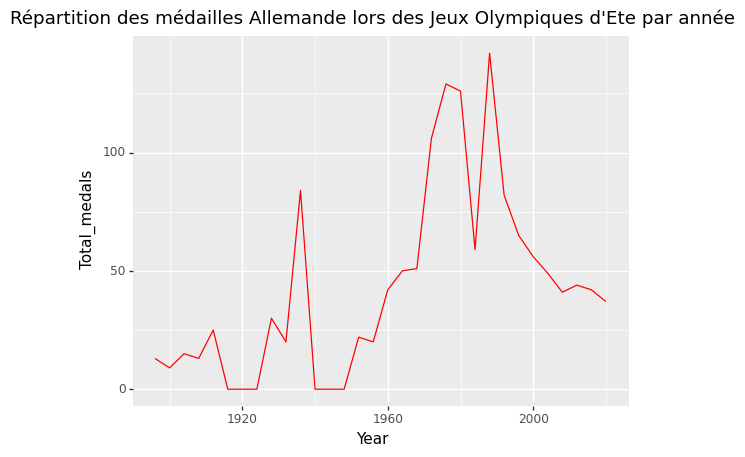

<ggplot: (170294851723)>

In [97]:
plot = p9.ggplot(data=medal_country,
           mapping=p9.aes(y="Total_medals", x="Year"))
plot + p9.geom_line(color='red') + p9.ggtitle("Répartition des médailles Allemande lors des Jeux Olympiques d'Ete par année")

# 2

In [98]:
#Athlete total
Athletes = REHO.groupby(by=["game_year"]).size().reset_index(name='athletes_total')
Athletes.head()

,game_year,athletes_total
0,1896,88
1,1900,60
2,1904,61
3,1908,78
4,1912,126


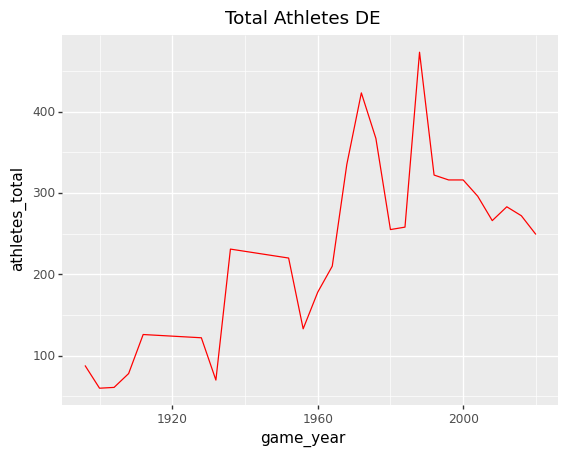

<ggplot: (170293571847)>

In [99]:
plotA = p9.ggplot(data=Athletes,
           mapping=p9.aes(y="athletes_total", x="game_year"))
plotA + p9.geom_line(color='red') + p9.ggtitle("Total Athletes DE")

In [100]:
Homme = Medaille[Medaille["event_gender"] == "Men"]
Homme.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
116,Ski Jumping,beijing-2022,Men's Team,Men,BRONZE,GameTeam,Germany,NaN,NaN,Germany,DE,GER
119,Ski Jumping,beijing-2022,Men's LH Individual,Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/geiger,Karl GEIGER,Germany,DE,GER
161,Luge,beijing-2022,Men's Singles,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/johannes-ludwig,Johannes LUDWIG,Germany,DE,GER
241,Skeleton,beijing-2022,Men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/axel-jungk,Axel JUNGK,Germany,DE,GER
243,Skeleton,beijing-2022,Men,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/christopher-g...,Christopher GROTHEER,Germany,DE,GER


In [101]:
dates = []
for value in Homme["slug_game"].values:
    dates.append(int(value.split("-")[-1]))
    
Homme.insert(12, "date", np.array(dates))

In [102]:
Homme.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,date
116,Ski Jumping,beijing-2022,Men's Team,Men,BRONZE,GameTeam,Germany,NaN,NaN,Germany,DE,GER,2022
119,Ski Jumping,beijing-2022,Men's LH Individual,Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/geiger,Karl GEIGER,Germany,DE,GER,2022
161,Luge,beijing-2022,Men's Singles,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/johannes-ludwig,Johannes LUDWIG,Germany,DE,GER,2022
241,Skeleton,beijing-2022,Men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/axel-jungk,Axel JUNGK,Germany,DE,GER,2022
243,Skeleton,beijing-2022,Men,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/christopher-g...,Christopher GROTHEER,Germany,DE,GER,2022


In [105]:
HommeY = Homme.groupby(by="date").event_gender.size().reset_index(name='athletes homme')
HommeY.head()

,date,athletes homme
0,1896,13
1,1900,7
2,1904,15
3,1908,12
4,1912,22


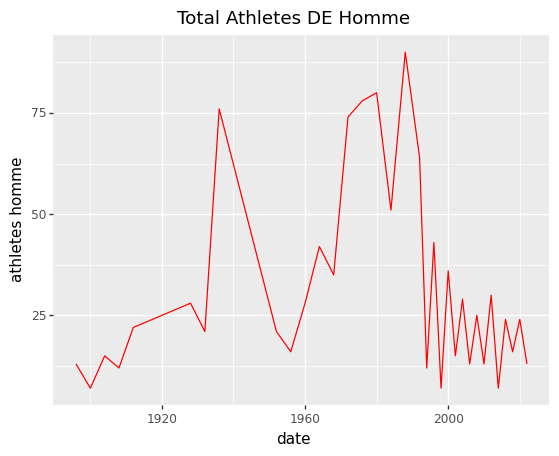

<ggplot: (170293560149)>

In [106]:
plotH = p9.ggplot(data=HommeY,
           mapping=p9.aes(x="date", y="athletes homme"))
plotH + p9.geom_line(color='red') + p9.ggtitle("Total Athletes DE Homme")

In [108]:
Femme = Medaille[Medaille["event_gender"] == "Women"]
Femme.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
35,Freestyle Skiing,beijing-2022,Women's Ski Cross,Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/daniela-maier,Daniela MAIER,Germany,DE,GER
123,Ski Jumping,beijing-2022,Women's NH Individual,Women,SILVER,Athlete,NaN,https://olympics.com/en/athletes/katharina-alt...,Katharina ALTHAUS,Germany,DE,GER
163,Luge,beijing-2022,Women's Singles,Women,SILVER,Athlete,NaN,https://olympics.com/en/athletes/anna-berreiter,Anna BERREITER,Germany,DE,GER
165,Luge,beijing-2022,Women's Singles,Women,GOLD,Athlete,NaN,https://olympics.com/en/athletes/natalie-geise...,Natalie GEISENBERGER,Germany,DE,GER
192,Biathlon,beijing-2022,Women's 4x6km Relay,Women,BRONZE,GameTeam,Germany,NaN,NaN,Germany,DE,GER


In [110]:
dates = []
for value in Femme["slug_game"].values:
    dates.append(int(value.split("-")[-1]))
    
Femme.insert(12, "date", np.array(dates))

In [111]:
FemmeY = Femme.groupby(by="date").event_gender.size().reset_index(name='athletes femme')
FemmeY.head()

,date,athletes femme
0,1908,1
1,1912,2
2,1928,6
3,1932,2
4,1936,15


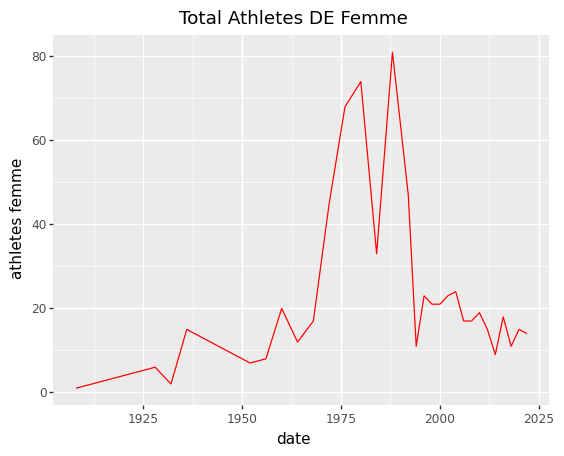

<ggplot: (170296071690)>

In [112]:
plotF = p9.ggplot(data=FemmeY,
           mapping=p9.aes(x="date", y="athletes femme"))
plotF + p9.geom_line(color='red') + p9.ggtitle("Total Athletes DE Femme")

In [114]:
Mixed = Medaille[Medaille["event_gender"] == "Mixed"]
Mixed.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
151,Luge,beijing-2022,Team Relay,Mixed,GOLD,GameTeam,Germany,NaN,NaN,Germany,DE,GER
221,Alpine Skiing,beijing-2022,Mixed Team Parallel,Mixed,SILVER,GameTeam,Germany,NaN,NaN,Germany,DE,GER
961,Judo,tokyo-2020,Mixed Team,Mixed,BRONZE,GameTeam,Germany,NaN,NaN,Germany,DE,GER
1386,Sailing,tokyo-2020,Nacra 17 Mixed,Mixed,BRONZE,GameTeam,Germany,https://olympics.com/en/athletes/paul-kohlhoff,Paul KOHLHOFF,Germany,DE,GER
1387,Sailing,tokyo-2020,Nacra 17 Mixed,Mixed,BRONZE,GameTeam,Germany,https://olympics.com/en/athletes/alica-stuhlemmer,Alica STUHLEMMER,Germany,DE,GER


In [115]:
dates = []
for value in Mixed["slug_game"].values:
    dates.append(int(value.split("-")[-1]))
    
Mixed.insert(12, "date", np.array(dates))

In [117]:
MixedY = Mixed.groupby(by="date").event_gender.size().reset_index(name='athletes equ')
MixedY.head()

,date,athletes equ
0,1908,2
1,1912,2
2,1936,2
3,1952,2
4,1960,2


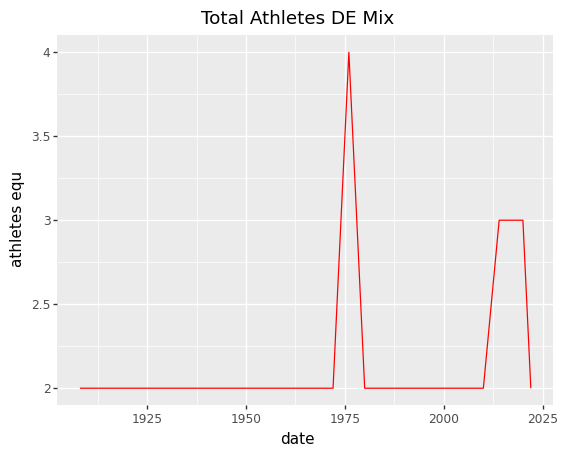

<ggplot: (170293553366)>

In [118]:
plotM = p9.ggplot(data=MixedY,
           mapping=p9.aes(x="date", y="athletes equ"))
plotM + p9.geom_line(color='red') + p9.ggtitle("Total Athletes DE Mix")

In [119]:
A.head()

,date,athletes homme,athletes femme
0,1896,13,NaN
1,1900,7,NaN
2,1904,15,NaN
3,1908,12,1.0
4,1912,22,2.0


C:\Users\utilisateur\anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 3 rows containing missing values.


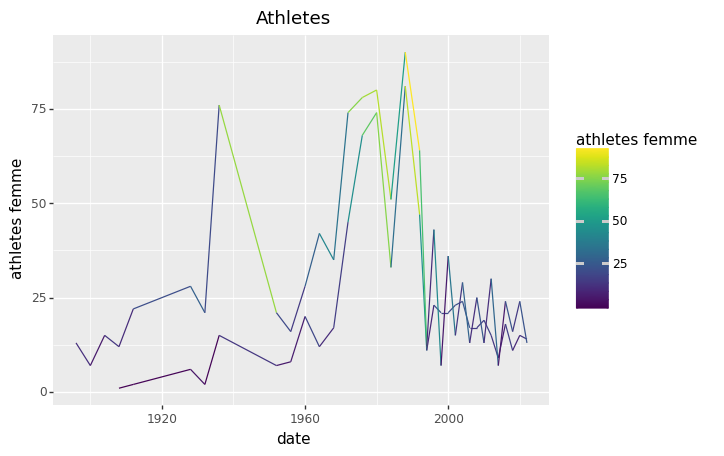

<ggplot: (170293664491)>

In [120]:
(ggplot(A)
 + geom_line(aes(x='date', y='athletes femme',color="athletes femme"))
 + geom_line(aes(x='date', y='athletes homme', color="athletes homme"))
 + ggtitle('Athletes')
)